https://pythonistaplanet.com/image-classification-using-deep-learning/

In [1]:
# import:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout, InputLayer
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np

import glob

from IPython.display import display
from PIL import Image

from matplotlib import pyplot as plt

In [2]:
classifier = Sequential()

In [3]:
classifier.add(InputLayer(input_shape = (64, 64, 3)))
classifier.add(Conv2D(32, (3,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Conv2D(32, (3,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Conv2D(32, (3,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten())
classifier.add(Dense(64))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))

In [4]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
trainGen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

testGen = ImageDataGenerator(rescale = 1./255)

In [6]:
BATCHSIZE = 32

In [7]:
trainSet = trainGen.flow_from_directory('/Users/kaylaneal/Downloads/alzResearch/dogs-vs-cats/train', target_size = (64,64), batch_size = BATCHSIZE, class_mode = 'binary')

testSet = testGen.flow_from_directory('/Users/kaylaneal/Downloads/alzResearch/dogs-vs-cats/test', target_size = (64,64), batch_size = BATCHSIZE, class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
history = classifier.fit(trainSet, epochs = 30, validation_data = testSet, validation_steps = (5000 // BATCHSIZE))

Epoch 1/30
625/625 [==============================] - 125s 199ms/step - loss: 0.6803 - accuracy: 0.5588 - val_loss: 0.5591 - val_accuracy: 0.7143
Epoch 2/30
625/625 [==============================] - 122s 196ms/step - loss: 0.5736 - accuracy: 0.7047 - val_loss: 0.5094 - val_accuracy: 0.7632
Epoch 3/30
625/625 [==============================] - 121s 194ms/step - loss: 0.5300 - accuracy: 0.7399 - val_loss: 0.4633 - val_accuracy: 0.7760
Epoch 4/30
625/625 [==============================] - 125s 200ms/step - loss: 0.4899 - accuracy: 0.7628 - val_loss: 0.4416 - val_accuracy: 0.7939
Epoch 5/30
625/625 [==============================] - 111s 178ms/step - loss: 0.4699 - accuracy: 0.7786 - val_loss: 0.4647 - val_accuracy: 0.7821
Epoch 6/30
625/625 [==============================] - 115s 184ms/step - loss: 0.4500 - accuracy: 0.7953 - val_loss: 0.4183 - val_accuracy: 0.8055
Epoch 7/30
625/625 [==============================] - 116s 186ms/step - loss: 0.4371 - accuracy: 0.8016 - val_loss: 0.4071 -

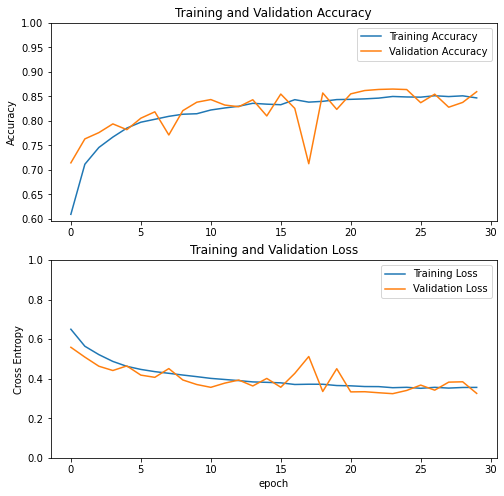

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)


plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [10]:
classifier.save('catdog.h5')

In [11]:
frankImages = list(glob.glob((r'/Users/kaylaneal/Downloads/alzResearch/frankphotos/dog') +'*/*'))

In [15]:
'''d = 0
c = 0

for im in frankImages:
    test_image =image.load_img(im, target_size =(64,64))
    test_image =image.img_to_array(test_image)
    test_image =np.expand_dims(test_image, axis =0)
    result = classifier.predict(test_image)
    if result[0][0] >= 0.5:
        prediction = 'dog'
        d += 1
    else:
        prediction = 'cat'
        c += 1
    print(prediction)
    
'''

"d = 0\nc = 0\n\nfor im in frankImages:\n    test_image =image.load_img(im, target_size =(64,64))\n    test_image =image.img_to_array(test_image)\n    test_image =np.expand_dims(test_image, axis =0)\n    result = classifier.predict(test_image)\n    if result[0][0] >= 0.5:\n        prediction = 'dog'\n        d += 1\n    else:\n        prediction = 'cat'\n        c += 1\n    print(prediction)\n    \n"